# K-Means Clustering

## Clustering

Clustering (or cluster analysis) is a technique that allows us to find groups (*clusters*) of similar objects that are more related to each other than to objects in other groups.

Clustering is used in a wide variety of applications, including:

- *Customer segmentation*

This is useful to understand who your customers are and what they need, so you can adapt your products and marketing campaigns to each segment.
For example, customer segmentation can be useful in recommender systems to suggest content that other users in the same cluster enjoyed.

- *Data analysis*

When you analyze a new dataset, it can be helpful to run a clustering algorithm, and then analyze each cluster separately.

- *Dimensionality reduction*

Once a dataset has been clustered, it is usually possible to measure each instance’s affinity with each cluster; affinity is any measure of how well an instance fits into a cluster.
Each instance’s feature vector x can then be replaced with the vector of its cluster affinities. If there are k clusters, then this vector is k-dimensional.
The new vector is typically much lower-dimensional than the original feature vector, but it can preserve enough information for further processing.

- *Feature engineering*

The cluster affinities can often be useful as extra features.

- *Anomaly detection* (AKA *outlier detection*)

Any instance that has a low affinity to all the clusters is likely to be an anomaly.

- *Semi-supervised learning*

If you only have a few labels, you could perform clustering and propagate the labels to all the instances in the same cluster.
This technique can greatly increase the number of labels available for a subsequent supervised learning algorithm, and thus improve its performance.

- *Search engines*

Some search engines let you search for images that are similar to a reference image.
To build such a system, you would first apply a clustering algorithm to all the images in your database; similar images would end up in the same cluster.
Then when a user provides a reference image, all you’d need to do is use the trained clustering model to find this image’s cluster, and you could then simply return all the images from this cluster.

- *Image segmentation*

By clustering pixels according to their color, then replacing each pixel’s color with the mean color of its cluster, it is possible to considerably reduce the number of different colors in an image.
Image segmentation is used in many object detection and tracking systems, as it makes it easier to detect the contour of each object.

## K-Means clustering with scikit-learn

### Example 01 - K-Means clustering

#### Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='white')

In [2]:
df = pd.read_csv('./data/bank-full.csv')
df

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed  subscribed  
0           5191.0          no  
1           5191.0          no  
2           5191.0          no  
3           5191.0          no  
4           5191.0          no  
...            ...         ...  
41183       4963.6         yes  
41184       4963.6          no  
41185       4963.6          no  
41186       4963.6         yes  
41187       4963.6          no  

[41188 rows x 21 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

<Axes: xlabel='age', ylabel='Count'>

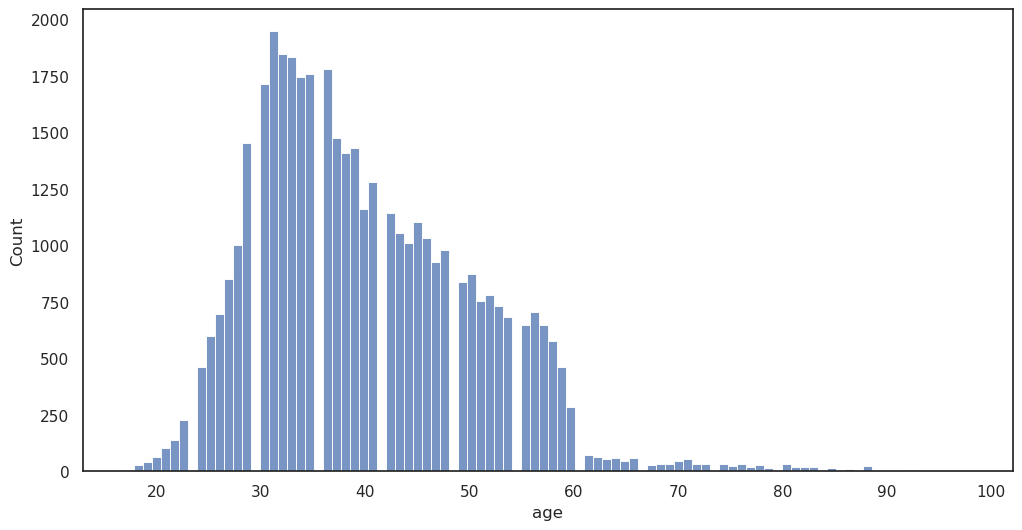

In [5]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age')

<Axes: xlabel='age', ylabel='Count'>

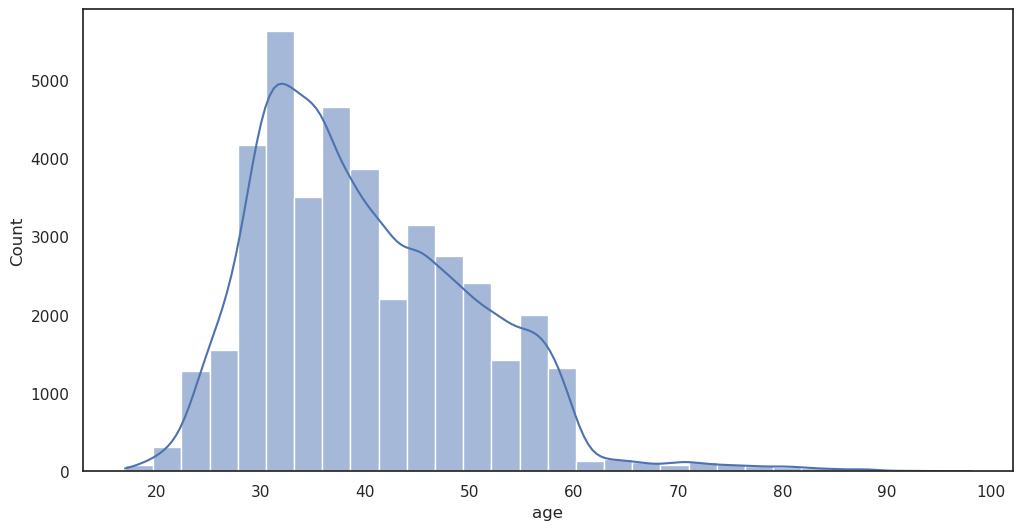

In [6]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', bins=30, kde=True)

<Axes: xlabel='age', ylabel='Count'>

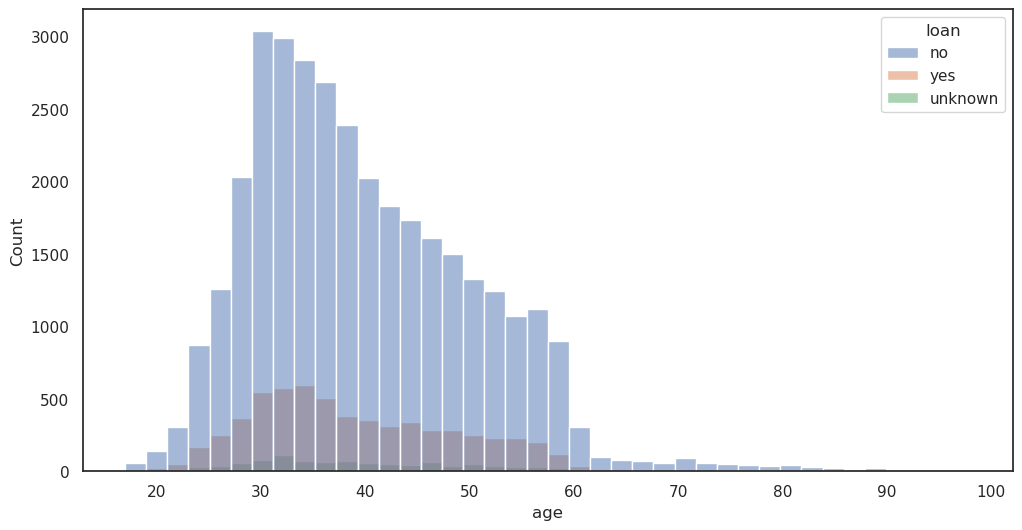

In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', bins=40, hue='loan')

<Axes: xlabel='pdays', ylabel='Count'>

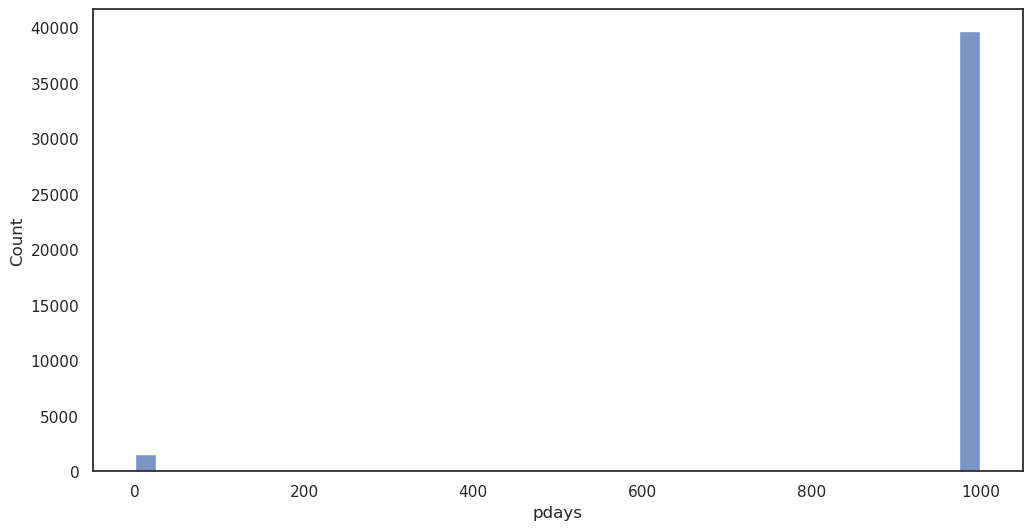

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='pdays', bins=40)

<Axes: xlabel='pdays', ylabel='Count'>

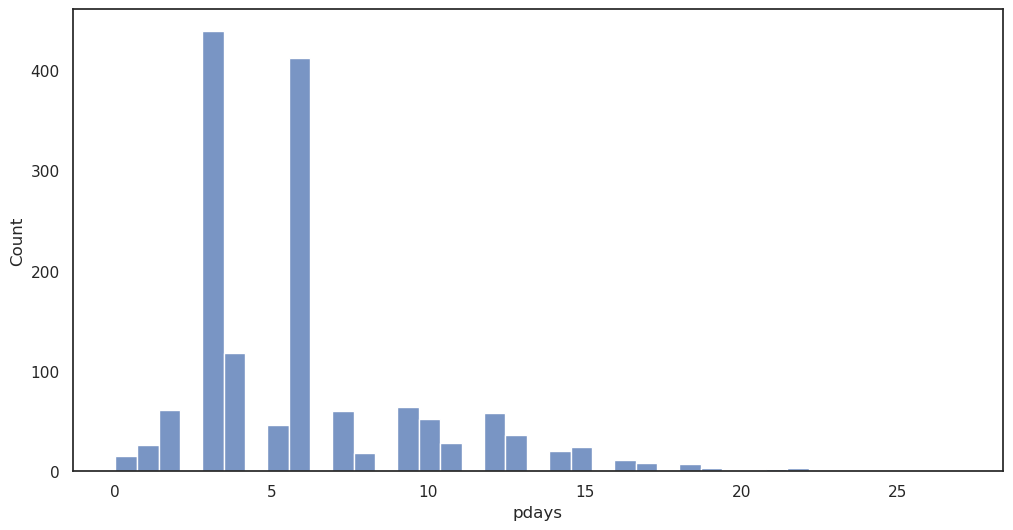

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['pdays']!=999], x='pdays')

In [10]:
df['duration']

0        261
1        149
2        226
3        151
4        307
        ... 
41183    334
41184    383
41185    189
41186    442
41187    239
Name: duration, Length: 41188, dtype: int64

<Axes: xlabel='duration', ylabel='Count'>

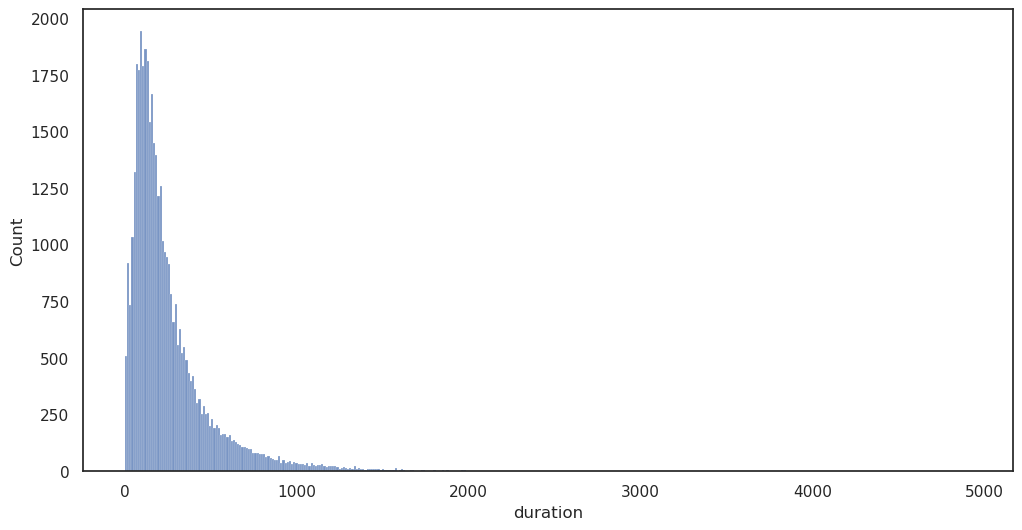

In [11]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='duration')

<Axes: xlabel='duration', ylabel='Count'>

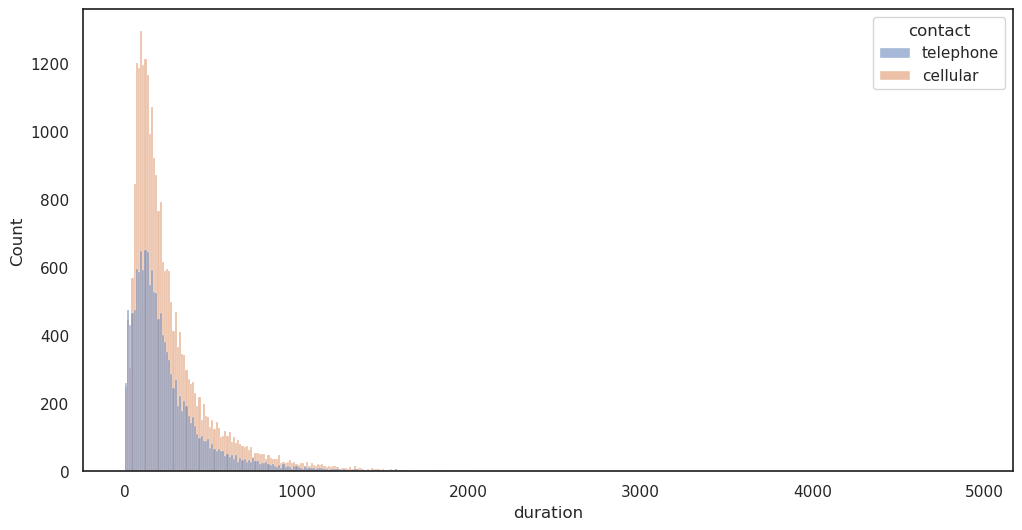

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='duration', hue='contact')

(0.0, 1000.0)

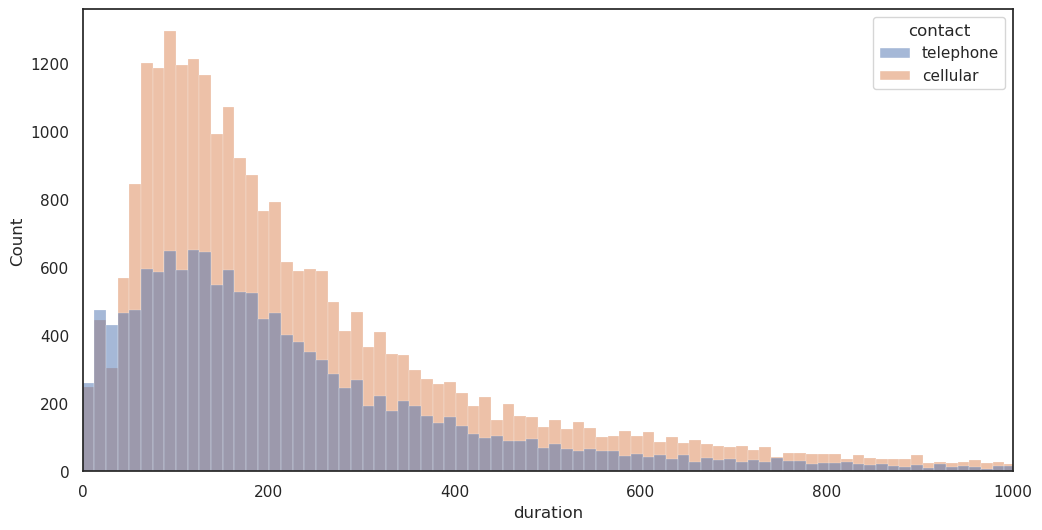

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='duration', hue='contact')
plt.xlim(0, 1000)

<Axes: xlabel='contact', ylabel='count'>

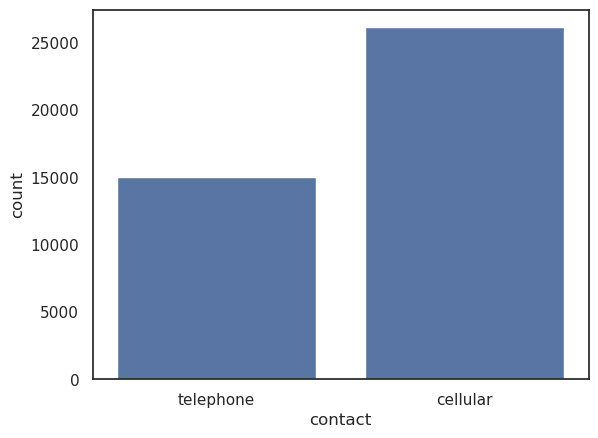

In [14]:
sns.countplot(data=df, x='contact')

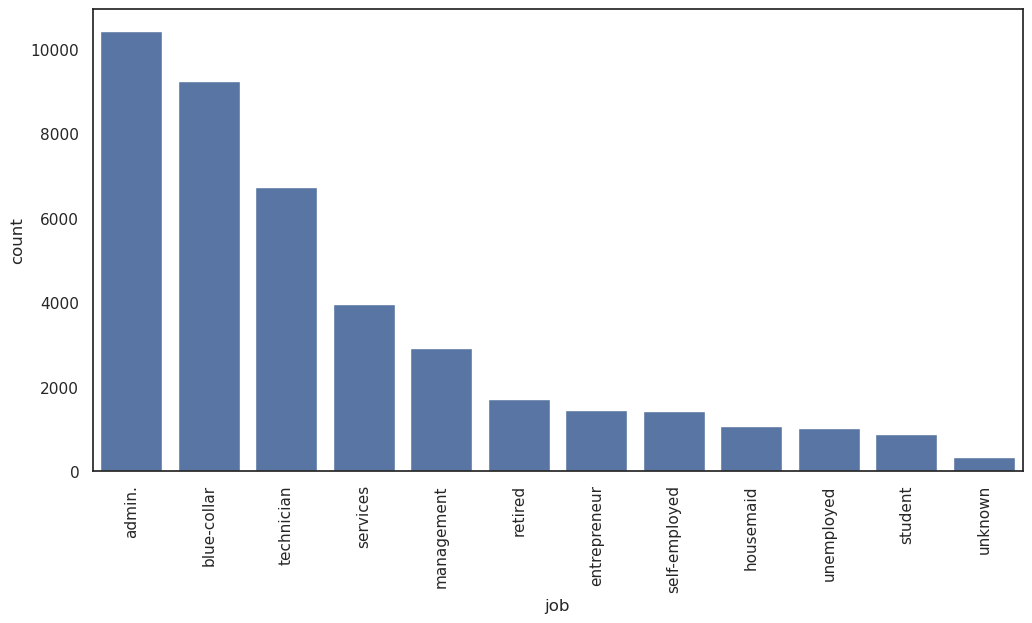

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

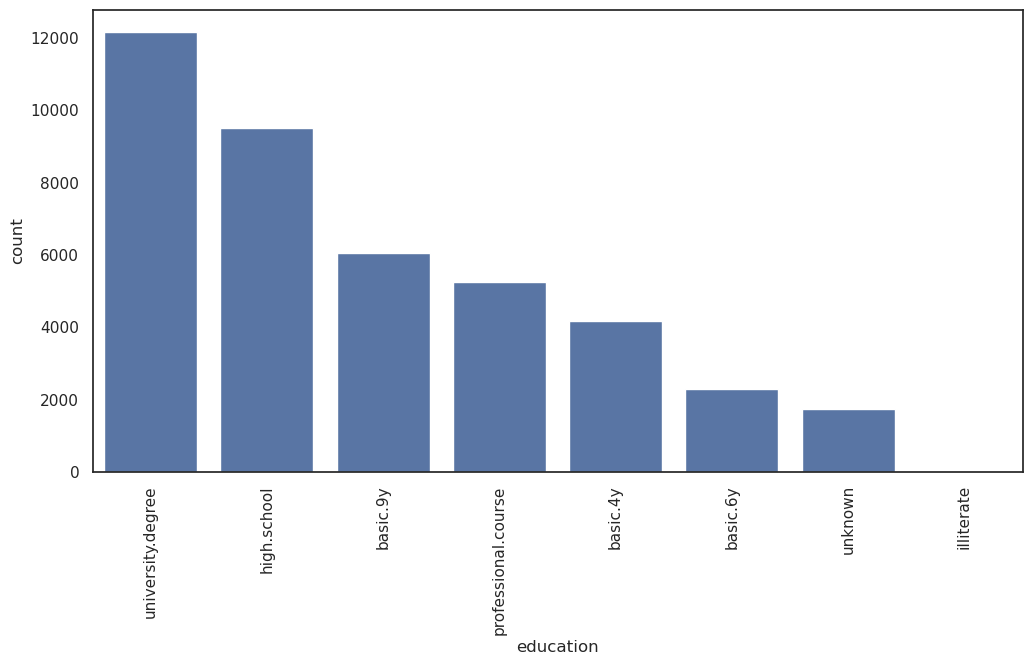

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='education', order=df['education'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

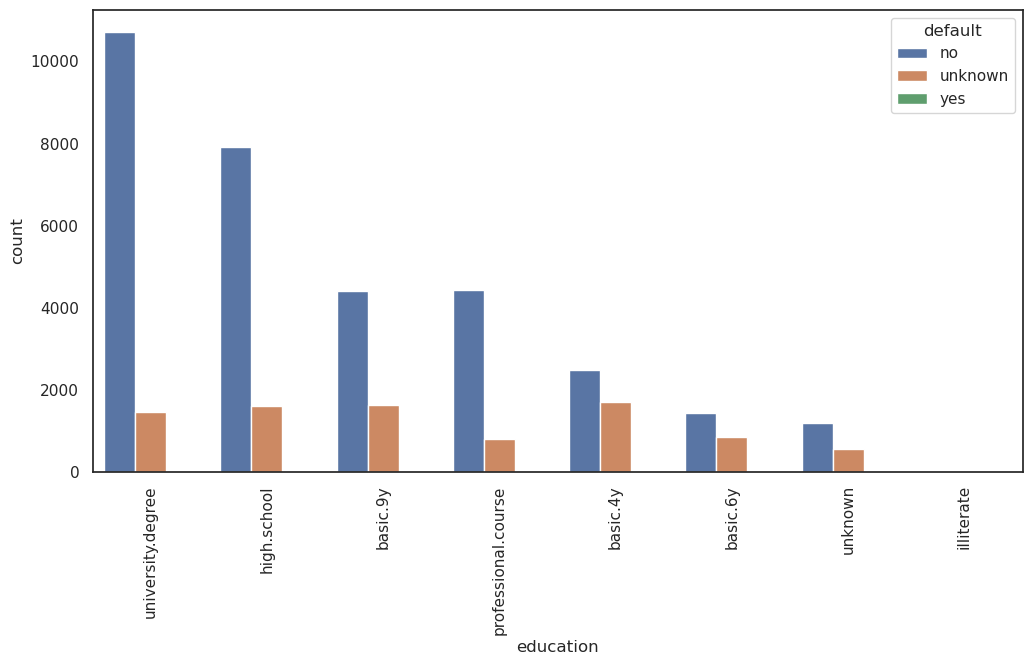

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='education', order=df['education'].value_counts().index, hue='default')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='default', ylabel='count'>

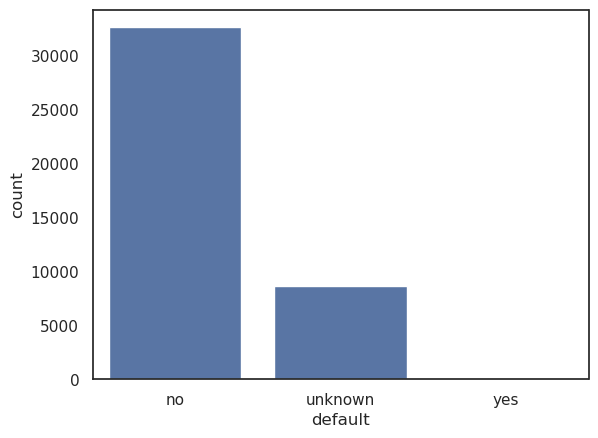

In [18]:
sns.countplot(data=df, x='default')

In [19]:
df['default'].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

In [20]:
df['loan'].value_counts()

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

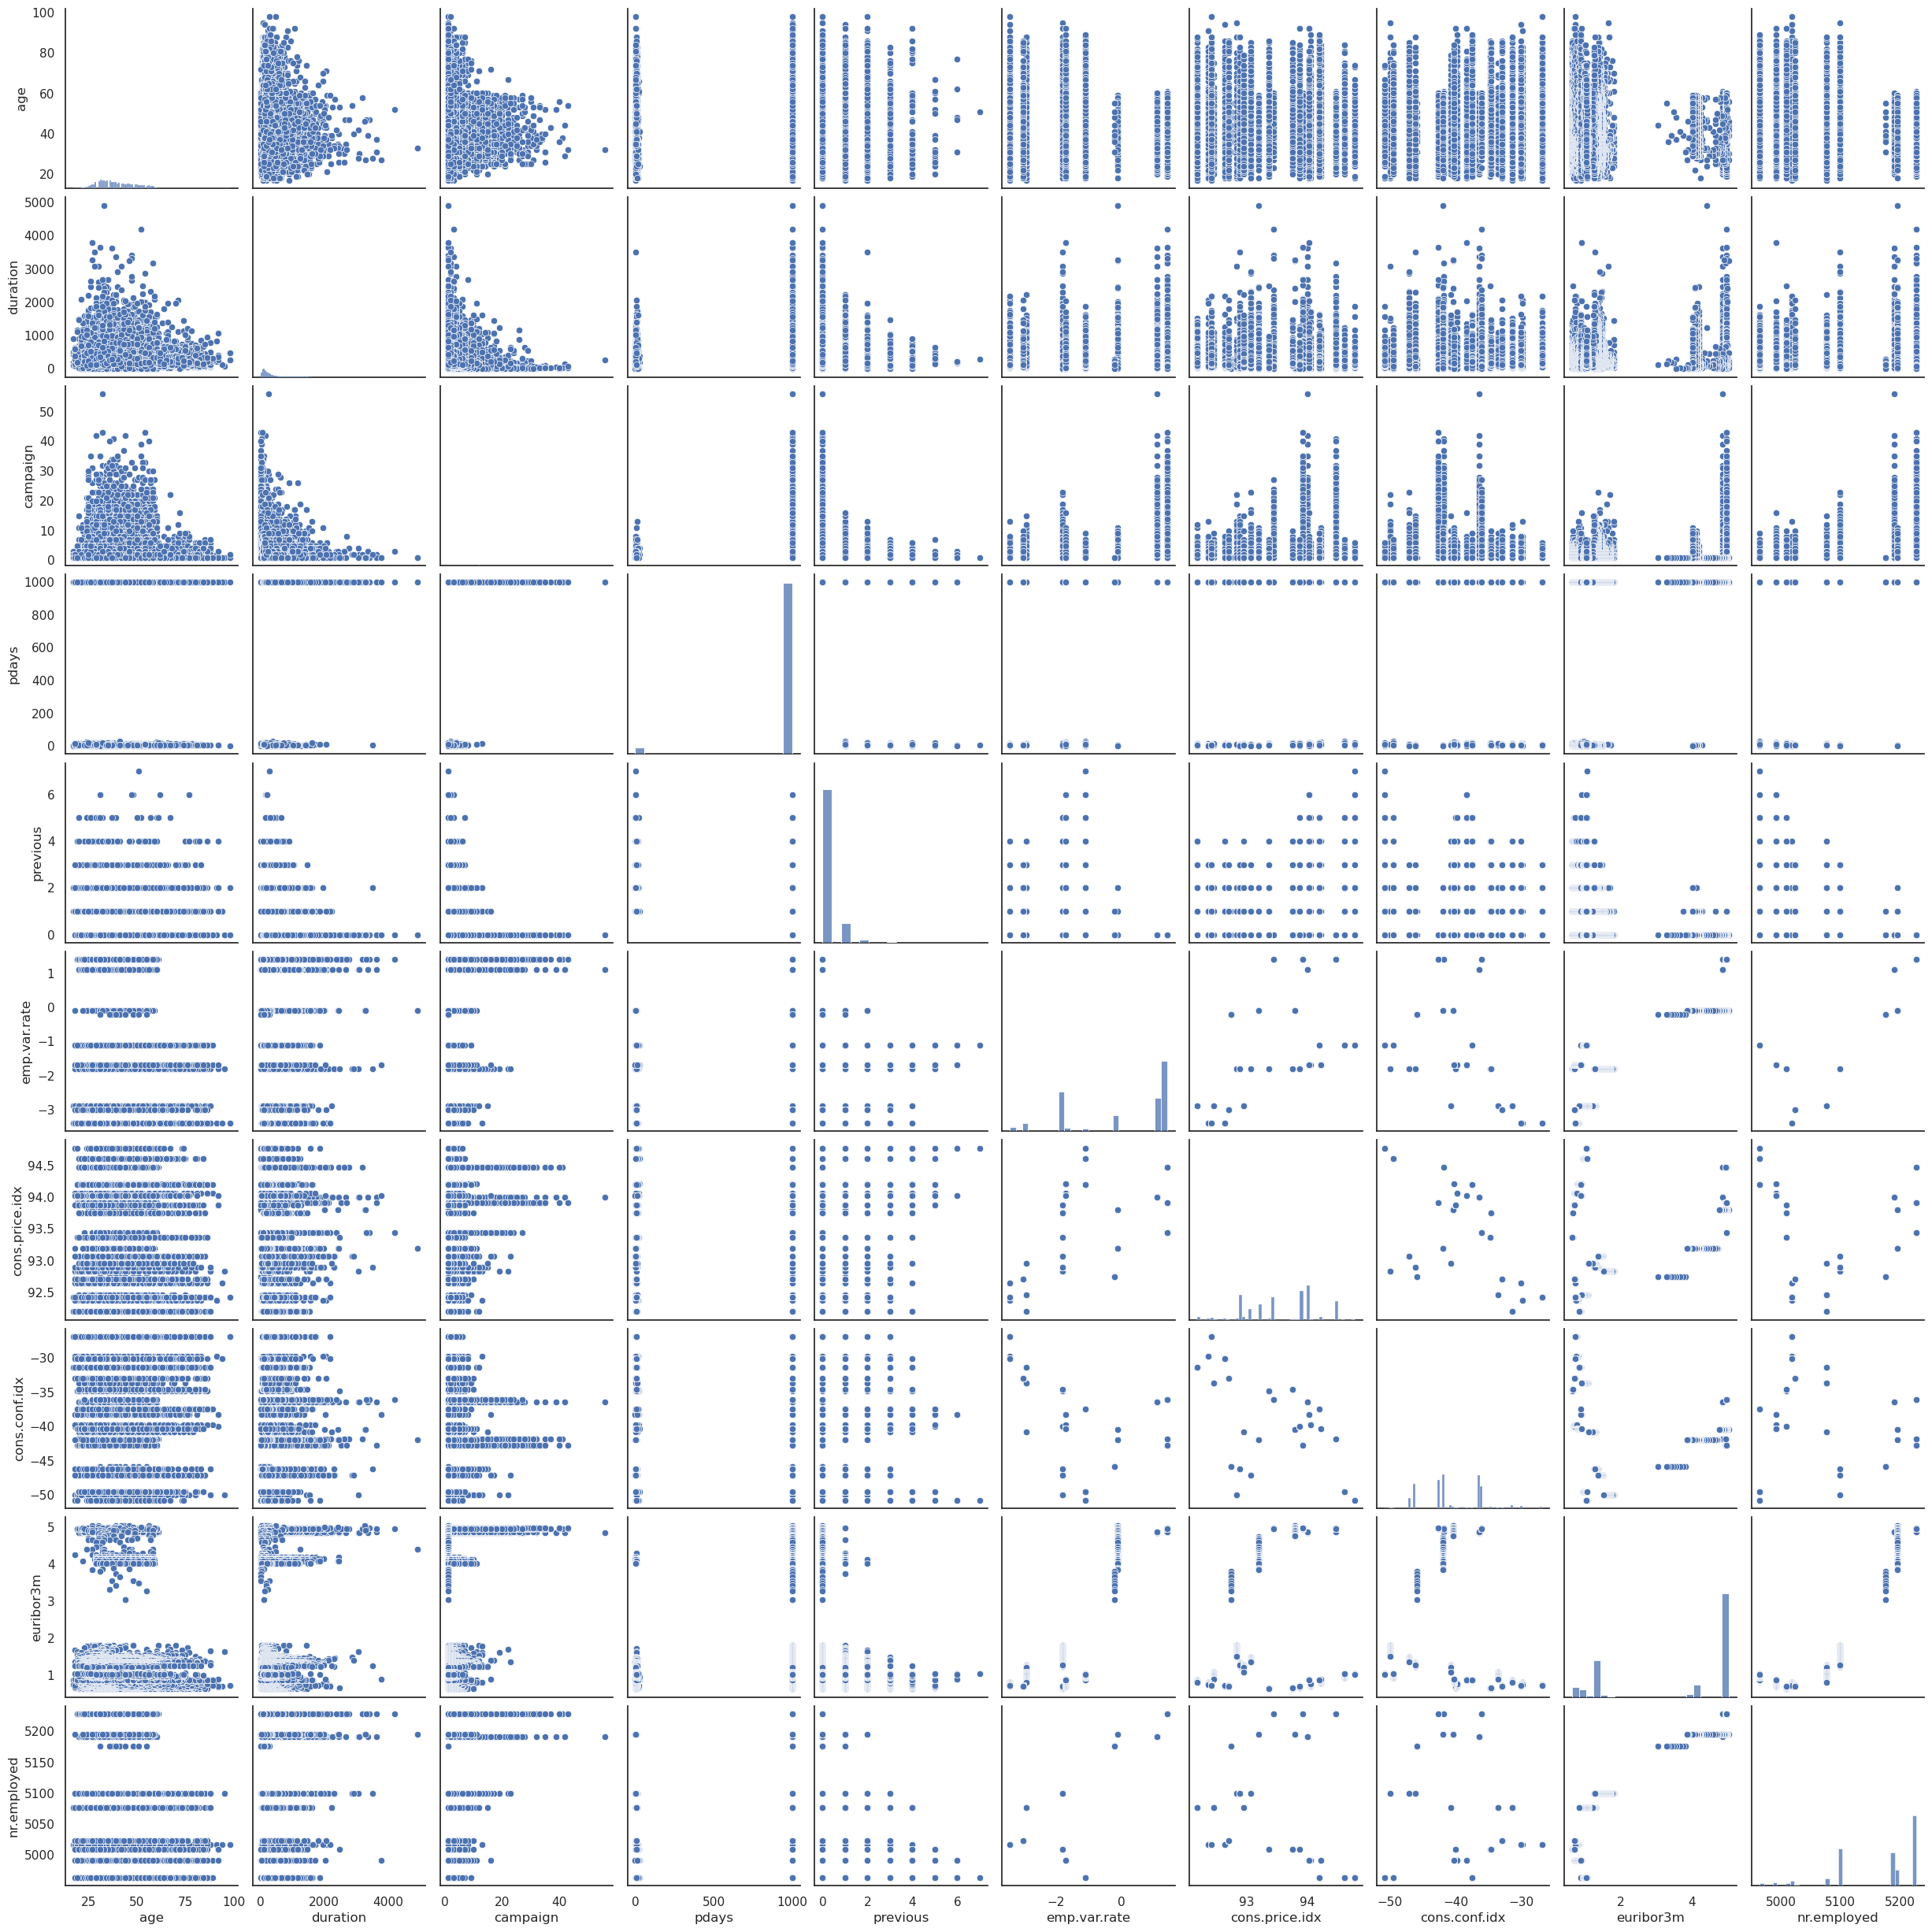

In [21]:
sns.pairplot(df)

#### Data Preparation and Model Fitting

In [22]:
X = pd.get_dummies(df)
X

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0       56       261         1    999         0           1.1          93.994   
1       57       149         1    999         0           1.1          93.994   
2       37       226         1    999         0           1.1          93.994   
3       40       151         1    999         0           1.1          93.994   
4       56       307         1    999         0           1.1          93.994   
...    ...       ...       ...    ...       ...           ...             ...   
41183   73       334         1    999         0          -1.1          94.767   
41184   46       383         1    999         0          -1.1          94.767   
41185   56       189         2    999         0          -1.1          94.767   
41186   44       442         1    999         0          -1.1          94.767   
41187   74       239         3    999         1          -1.1          94.767   

       cons.conf.idx  euribor3m  nr.employed  ...  day_of_week_fri  \
0              -36.4      4.857       5191.0  ...            False   
1              -36.4      4.857       5191.0  ...            False   
2              -36.4      4.857       5191.0  ...            False   
3              -36.4      4.857       5191.0  ...            False   
4              -36.4      4.857       5191.0  ...            False   
...              ...        ...          ...  ...              ...   
41183          -50.8      1.028       4963.6  ...             True   
41184          -50.8      1.028       4963.6  ...             True   
41185          -50.8      1.028       4963.6  ...             True   
41186          -50.8      1.028       4963.6  ...             True   
41187          -50.8      1.028       4963.6  ...             True   

       day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  \
0                 True            False            False            False   
1                 True            False            False            False   
2                 True            False            False            False   
3                 True            False            False            False   
4                 True            False            False            False   
...                ...              ...              ...              ...   
41183            False            False            False            False   
41184            False            False            False            False   
41185            False            False            False            False   
41186            False            False            False            False   
41187            False            False            False            False   

       poutcome_failure  poutcome_nonexistent  poutcome_success  \
0                 False                  True             False   
1                 False                  True             False   
2                 False                  True             False   
3                 False                  True             False   
4                 False                  True             False   
...                 ...                   ...               ...   
41183             False                  True             False   
41184             False                  True             False   
41185             False                  True             False   
41186             False                  True             False   
41187              True                 False             False   

       subscribed_no  subscribed_yes  
0               True           False  
1               True           False  
2               True           False  
3               True           False  
4               True           False  
...              ...             ...  
41183          False            True  
41184           True           False  
41185           True           False  
41186          False            True  
41187           True           Fal

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
scaled_X = scaler.fit_transform(X)

In [26]:
from sklearn.cluster import KMeans

In [27]:
# model = KMeans(n_clusters=2)

model = KMeans(n_clusters=6)

In [28]:
cluster_labels = model.fit_predict(scaled_X)

In [29]:
X['Cluster'] = cluster_labels

In [30]:
X

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0       56       261         1    999         0           1.1          93.994   
1       57       149         1    999         0           1.1          93.994   
2       37       226         1    999         0           1.1          93.994   
3       40       151         1    999         0           1.1          93.994   
4       56       307         1    999         0           1.1          93.994   
...    ...       ...       ...    ...       ...           ...             ...   
41183   73       334         1    999         0          -1.1          94.767   
41184   46       383         1    999         0          -1.1          94.767   
41185   56       189         2    999         0          -1.1          94.767   
41186   44       442         1    999         0          -1.1          94.767   
41187   74       239         3    999         1          -1.1          94.767   

       cons.conf.idx  euribor3m  nr.employed  ...  day_of_week_mon  \
0              -36.4      4.857       5191.0  ...             True   
1              -36.4      4.857       5191.0  ...             True   
2              -36.4      4.857       5191.0  ...             True   
3              -36.4      4.857       5191.0  ...             True   
4              -36.4      4.857       5191.0  ...             True   
...              ...        ...          ...  ...              ...   
41183          -50.8      1.028       4963.6  ...            False   
41184          -50.8      1.028       4963.6  ...            False   
41185          -50.8      1.028       4963.6  ...            False   
41186          -50.8      1.028       4963.6  ...            False   
41187          -50.8      1.028       4963.6  ...            False   

       day_of_week_thu  day_of_week_tue  day_of_week_wed  poutcome_failure  \
0                False            False            False             False   
1                False            False            False             False   
2                False            False            False             False   
3                False            False            False             False   
4                False            False            False             False   
...                ...              ...              ...               ...   
41183            False            False            False             False   
41184            False            False            False             False   
41185            False            False            False             False   
41186            False            False            False             False   
41187            False            False            False              True   

       poutcome_nonexistent  poutcome_success  subscribed_no  subscribed_yes  \
0                      True             False           True           False   
1                      True             False           True           False   
2                      True             False           True           False   
3                      True             False           True           False   
4                      True             False           True           False   
...                     ...               ...            ...             ...   
41183                  True             False          False            True   
41184                  True             False           True           False   
41185                  True             False           True           False   
41186                  True             False          False            True   
41187                 False             False           True           False   

       Cluster  
0            3  
1            3  
2            3  
3            3  
4            3  
...        ...  
41183        1  
41184        1  
41185        1  
41186        1  
41187        1  

[41188 rows x 66 columns]

In [31]:
X.corr()['Cluster'].iloc[:-1].sort_values()

pdays               -0.541382
contact_cellular    -0.481962
job_entrepreneur    -0.361634
poutcome_failure    -0.312283
month_apr           -0.230170
                       ...   
euribor3m            0.419062
emp.var.rate         0.423324
contact_telephone    0.481962
poutcome_success     0.517160
cons.price.idx       0.519795
Name: Cluster, Length: 65, dtype: float64

<Axes: >

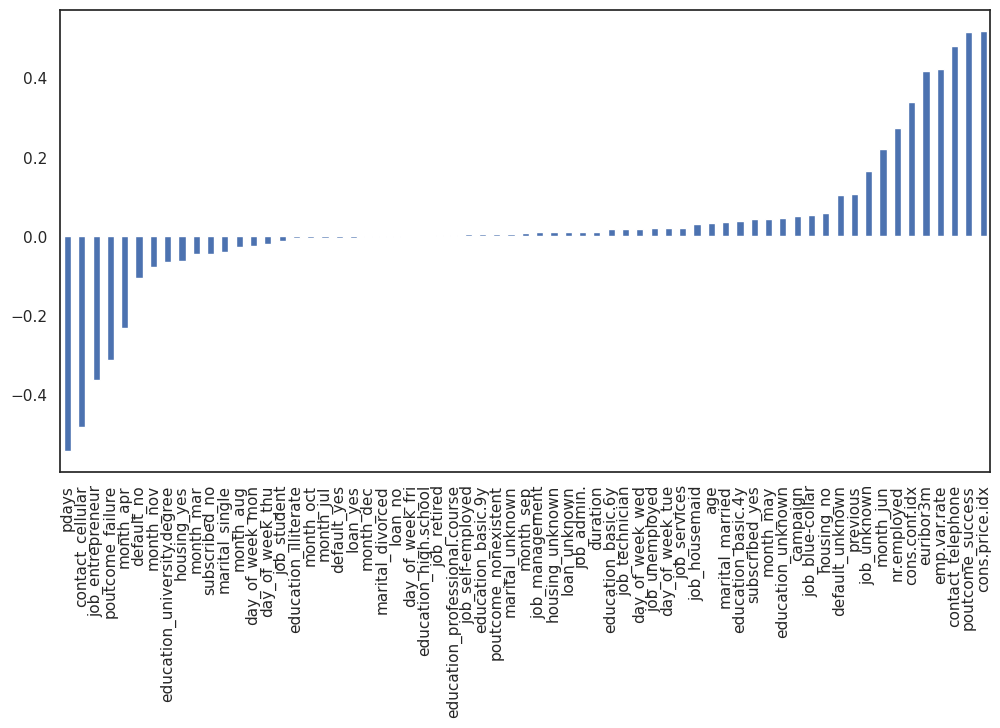

In [32]:
plt.figure(figsize=(12, 6))
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

#### Choosing a K Value using the sum of squared distances

In [33]:
ssd =  []

for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    ssd.append(model.inertia_)

In [34]:
ssd

[2587825.380951301,
 2370416.2974255863,
 2330176.5742265326,
 2268830.2700098744,
 2239516.3801566246,
 2099725.409258164,
 2125557.5047690277,
 2138620.114967935]

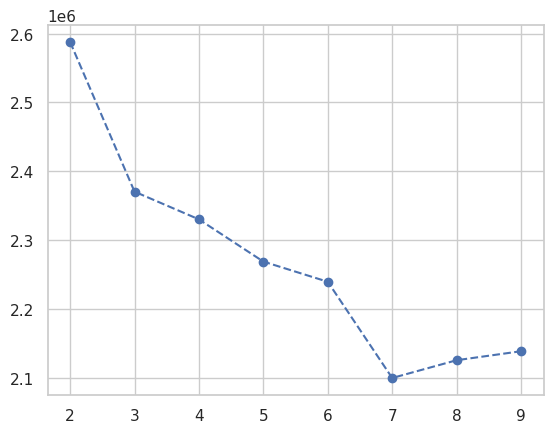

In [35]:
plt.plot(range(2,10), ssd, 'o--')

In [36]:
pd.Series(ssd)

0    2.587825e+06
1    2.370416e+06
2    2.330177e+06
3    2.268830e+06
4    2.239516e+06
5    2.099725e+06
6    2.125558e+06
7    2.138620e+06
dtype: float64

In [37]:
pd.Series(ssd).diff().sort_values()

1   -217409.083526
5   -139790.970898
3    -61346.304217
2    -40239.723199
4    -29313.889853
7     13062.610199
6     25832.095511
0              NaN
dtype: float64

### Example 02: Color quantization using K-Means

In [38]:
import matplotlib.image as mpimg

In [39]:
image_as_array = mpimg.imread('./img/palm-trees.jpg')

In [40]:
image_as_array

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  98],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 106],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 114],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

In [41]:
image_as_array.shape

(1401, 934, 3)

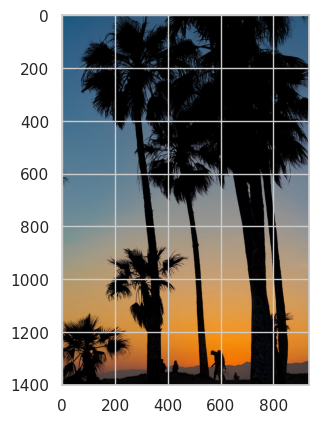

In [42]:
plt.imshow(image_as_array)

In [43]:
(h,w,c) = image_as_array.shape

In [44]:
image_as_array2d = image_as_array.reshape(h*w, c)

In [45]:
image_as_array2d

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], shape=(1308534, 3), dtype=uint8)

In [46]:
len(image_as_array.shape)

3

In [47]:
len(image_as_array2d.shape)

2

In [48]:
picmod = KMeans(n_clusters=6)

In [49]:
labels = picmod.fit_predict(image_as_array2d)

In [50]:
labels

array([2, 2, 2, ..., 1, 1, 1], shape=(1308534,), dtype=int32)

In [51]:
rgb_codes = picmod.cluster_centers_.round(0).astype(int)

In [52]:
rgb_codes

array([[191, 154, 110],
       [  3,   3,   4],
       [ 71, 109, 138],
       [219, 136,  47],
       [ 67,  62,  62],
       [137, 144, 144]])

In [53]:
rgb_codes[labels]

array([[ 71, 109, 138],
       [ 71, 109, 138],
       [ 71, 109, 138],
       ...,
       [  3,   3,   4],
       [  3,   3,   4],
       [  3,   3,   4]], shape=(1308534, 3))

In [54]:
quantized_image = np.reshape(rgb_codes[labels], (h,w,c))

In [55]:
quantized_image

array([[[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 67,  62,  62],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 67,  62,  62],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       ...,

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]]

In [56]:
image_as_array

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  98],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 106],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 114],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

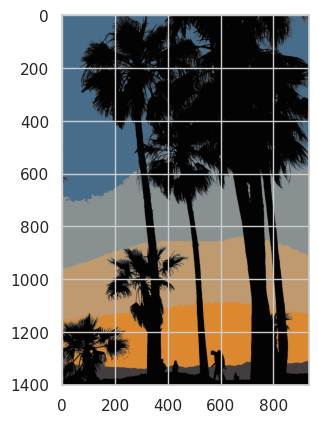

In [57]:
plt.imshow(quantized_image)

### Example 03 - K-means clustering

In [58]:
ccf = pd.read_csv('./data/CIA-Country-Facts.csv')

In [59]:
ccf

Country                               Region  Population  \
0       Afghanistan        ASIA (EX. NEAR EAST)             31056997   
1           Albania  EASTERN EUROPE                          3581655   
2           Algeria  NORTHERN AFRICA                        32930091   
3    American Samoa  OCEANIA                                   57794   
4           Andorra  WESTERN EUROPE                            71201   
..              ...                                  ...         ...   
222       West Bank  NEAR EAST                               2460492   
223  Western Sahara  NORTHERN AFRICA                          273008   
224           Yemen  NEAR EAST                              21456188   
225          Zambia  SUB-SAHARAN AFRICA                     11502010   
226        Zimbabwe  SUB-SAHARAN AFRICA                     12236805   

     Area (sq. mi.)  Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
0            647500                        48.0                          0.00   
1             28748                       124.6                          1.26   
2           2381740                        13.8                          0.04   
3               199                       290.4                         58.29   
4               468                       152.1                          0.00   
..              ...                         ...                           ...   
222            5860                       419.9                          0.00   
223          266000                         1.0                          0.42   
224          527970                        40.6                          0.36   
225          752614                        15.3                          0.00   
226          390580                        31.3                          0.00   

     Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)  \
0            23.06                              163.07               700.0   
1            -4.93                               21.52              4500.0   
2            -0.39                               31.00              6000.0   
3           -20.71                                9.27              8000.0   
4             6.60                                4.05             19000.0   
..             ...                                 ...                 ...   
222           2.98                               19.62               800.0   
223            NaN                                 NaN                 NaN   
224           0.00                               61.50               800.0   
225           0.00                               88.29               800.0   
226           0.00                               67.69              1900.0   

     Literacy (%)  Phones (per 1000)  Arable (%)  Crops (%)  Other (%)  \
0            36.0                3.2       12.13       0.22      87.65   
1            86.5               71.2       21.09       4.42      74.49   
2            70.0               78.1        3.22       0.25      96.53   
3            97.0              259.5       10.00      15.00      75.00   
4           100.0              497.2        2.22       0.00      97.78   
..            ...                ...         ...        ...        ...   
222           NaN              145.2       16.90      18.97      64.13   
223           NaN                NaN        0.02       0.00      99.98   
224          50.2               37.2        2.78       0.24      96.98   
225          80.6                8.2        7.08       0.03      92.90   
226          90.7               26.8        8.32       0.34      91.34   

     Climate  Birthrate  Deathrate  Agriculture  Industry  Service  
0        1.0      46.60      20.34        0.380     0.240    0.380  
1        3.0      15.11       5.22        0.232     0.188    0.579  
2        1.0      17.14       4.61        0.101     0.600    0.298  
3        2.0      22.46       3.27          NaN       NaN      NaN  
4  

In [60]:
ccf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [61]:
ccf.describe()

Population  Area (sq. mi.)  Pop. Density (per sq. mi.)  \
count  2.270000e+02    2.270000e+02                  227.000000   
mean   2.874028e+07    5.982270e+05                  379.047137   
std    1.178913e+08    1.790282e+06                 1660.185825   
min    7.026000e+03    2.000000e+00                    0.000000   
25%    4.376240e+05    4.647500e+03                   29.150000   
50%    4.786994e+06    8.660000e+04                   78.800000   
75%    1.749777e+07    4.418110e+05                  190.150000   
max    1.313974e+09    1.707520e+07                16271.500000   

       Coastline (coast/area ratio)  Net migration  \
count                    227.000000     224.000000   
mean                      21.165330       0.038125   
std                       72.286863       4.889269   
min                        0.000000     -20.990000   
25%                        0.100000      -0.927500   
50%                        0.730000       0.000000   
75%                       10.345000       0.997500   
max                      870.660000      23.060000   

       Infant mortality (per 1000 births)  GDP ($ per capita)  Literacy (%)  \
count                          224.000000          226.000000    209.000000   
mean                            35.506964         9689.823009     82.838278   
std                             35.389899        10049.138513     19.722173   
min                              2.290000          500.000000     17.600000   
25%                              8.150000         1900.000000     70.600000   
50%                             21.000000         5550.000000     92.500000   
75%                             55.705000        15700.000000     98.000000   
max                            191.190000        55100.000000    100.000000   

       Phones (per 1000)  Arable (%)   Crops (%)   Other (%)     Climate  \
count         223.000000  225.000000  225.000000  225.000000  205.000000   
mean          236.061435   13.797111    4.564222   81.638311    2.139024   
std           227.991829   13.040402    8.361470   16.140835    0.699397   
min             0.200000    0.000000    0.000000   33.330000    1.000000   
25%            37.800000    3.220000    0.190000   71.650000    2.000000   
50%           176.200000   10.420000    1.030000   85.700000    2.000000   
75%           389.650000   20.000000    4.440000   95.440000    3.000000   
max          1035.600000   62.110000   50.680000  100.000000    4.000000   

        Birthrate   Deathrate  Agriculture    Industry     Service  
count  224.000000  223.000000   212.000000  211.000000  212.000000  
mean    22.114732    9.241345     0.150844    0.282711    0.565283  
std     11.176716    4.990026     0.146798    0.138272    0.165841  
min      7.290000    2.290000     0.000000    0.020000    0.062000  
25%     12.672500    5.910000     0.037750    0.193000    0.429250  
50%     18.790000    7.840000     0.099000    0.272000    0.571000  
75%     29.820000   10.605000     0.221000    0.341000    0.678500  
max     50.730000   29.740000     0.769000    0.906000    0.954000

In [62]:
ccf.describe().transpose()

count          mean           std  \
Population                          227.0  2.874028e+07  1.178913e+08   
Area (sq. mi.)                      227.0  5.982270e+05  1.790282e+06   
Pop. Density (per sq. mi.)          227.0  3.790471e+02  1.660186e+03   
Coastline (coast/area ratio)        227.0  2.116533e+01  7.228686e+01   
Net migration                       224.0  3.812500e-02  4.889269e+00   
Infant mortality (per 1000 births)  224.0  3.550696e+01  3.538990e+01   
GDP ($ per capita)                  226.0  9.689823e+03  1.004914e+04   
Literacy (%)                        209.0  8.283828e+01  1.972217e+01   
Phones (per 1000)                   223.0  2.360614e+02  2.279918e+02   
Arable (%)                          225.0  1.379711e+01  1.304040e+01   
Crops (%)                           225.0  4.564222e+00  8.361470e+00   
Other (%)                           225.0  8.163831e+01  1.614083e+01   
Climate                             205.0  2.139024e+00  6.993968e-01   
Birthrate                           224.0  2.211473e+01  1.117672e+01   
Deathrate                           223.0  9.241345e+00  4.990026e+00   
Agriculture                         212.0  1.508443e-01  1.467980e-01   
Industry                            211.0  2.827109e-01  1.382722e-01   
Service                             212.0  5.652830e-01  1.658410e-01   

                                         min           25%          50%  \
Population                          7026.000  437624.00000  4786994.000   
Area (sq. mi.)                         2.000    4647.50000    86600.000   
Pop. Density (per sq. mi.)             0.000      29.15000       78.800   
Coastline (coast/area ratio)           0.000       0.10000        0.730   
Net migration                        -20.990      -0.92750        0.000   
Infant mortality (per 1000 births)     2.290       8.15000       21.000   
GDP ($ per capita)                   500.000    1900.00000     5550.000   
Literacy (%)                          17.600      70.60000       92.500   
Phones (per 1000)                      0.200      37.80000      176.200   
Arable (%)                             0.000       3.22000       10.420   
Crops (%)                              0.000       0.19000        1.030   
Other (%)                             33.330      71.65000       85.700   
Climate                                1.000       2.00000        2.000   
Birthrate                              7.290      12.67250       18.790   
Deathrate                              2.290       5.91000        7.840   
Agriculture                            0.000       0.03775        0.099   
Industry                               0.020       0.19300        0.272   
Service                                0.062       0.42925        0.571   

                                             75%           max  
Population                          1.749777e+07  1.313974e+09  
Area (sq. mi.)                      4.418110e+05  1.707520e+07  
Pop. Density (per sq. mi.)          1.901500e+02  1.627150e+04  
Coastline (coast/area ratio)        1.034500e+01  8.706600e+02  
Net migration                       9.975000e-01  2.306000e+01  
Infant mortality (per 1000 births)  5.570500e+01  1.911900e+02  
GDP ($ per capita)                  1.570000e+04  5.510000e+04  
Literacy (%)                        9.800000e+01  1.000000e+02  
Phones (per 1000)                   3.896500e+02  1.035600e+03  
Arable (%)                          2.000000e+01  6.211000e+01  
Crops (%)                           4.440000e+00  5.068000e+01  
Other (%)                           9.544000e+01  1.000000e+02  
Climate                             3.000000e+00  4.000000e+00  
Birthrate                           2.982000e+01  5.073000e+01  
Deathrate                           1.060500e+01  2.974000e+01  
Agriculture                         2.210000e-01  7.690000e-01  
Industry                            3.410000e-01  9.060000e-01  
Service                             6.785000e-01  9.

<Axes: xlabel='Population', ylabel='Count'>

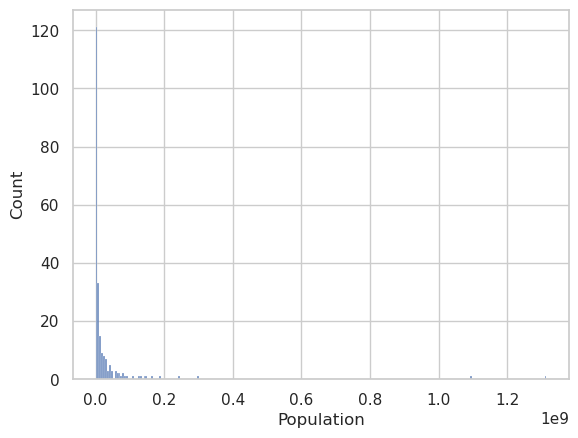

In [63]:
sns.histplot(data=ccf, x='Population')

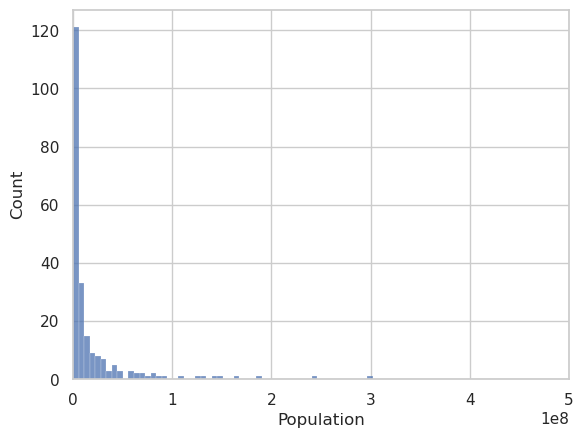

In [64]:
sns.histplot(data=ccf, x='Population')
plt.xlim(0, 500_000_000)
plt.show()

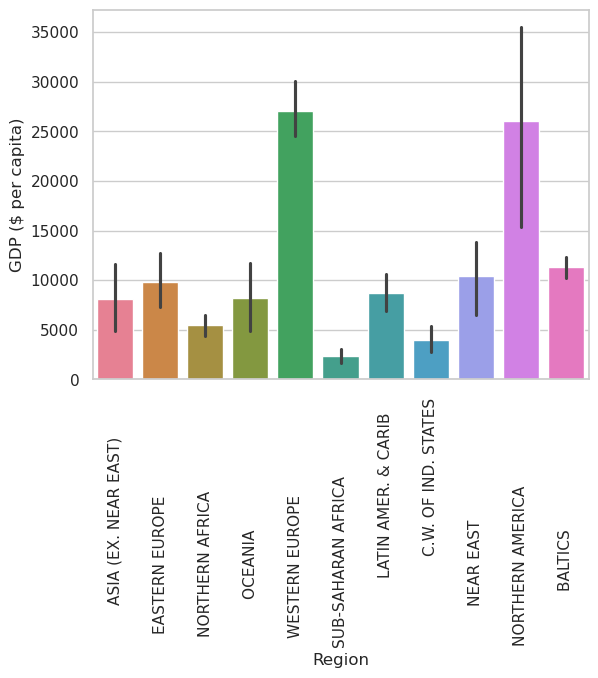

In [65]:
sns.barplot(data=ccf, y='GDP ($ per capita)', x='Region', estimator=np.mean, hue='Region')
plt.xticks(rotation=90)
plt.show()

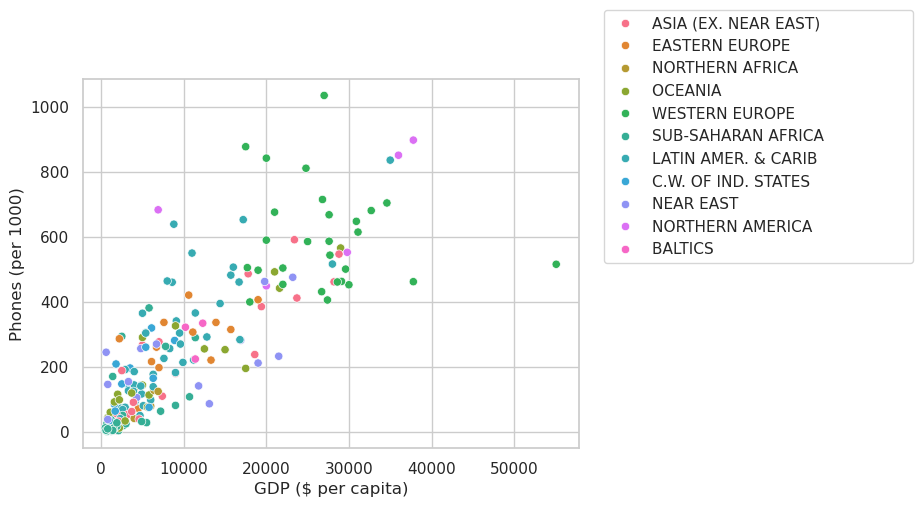

In [66]:
sns.scatterplot(data=ccf, x='GDP ($ per capita)', y='Phones (per 1000)', hue='Region')
plt.legend(loc=(1.05,0.5))

<Axes: xlabel='GDP ($ per capita)', ylabel='Literacy (%)'>

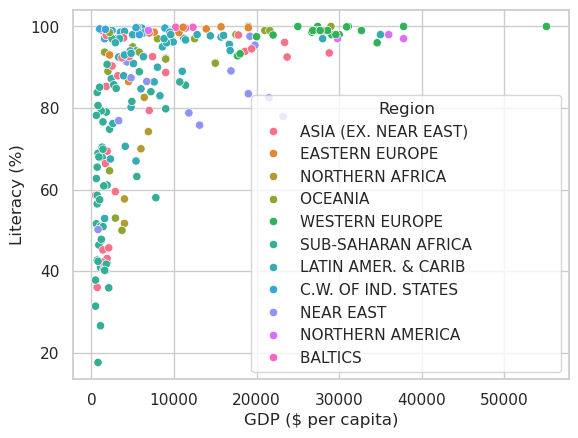

In [67]:
sns.scatterplot(data=ccf,x='GDP ($ per capita)',y='Literacy (%)',hue='Region')

<Axes: >

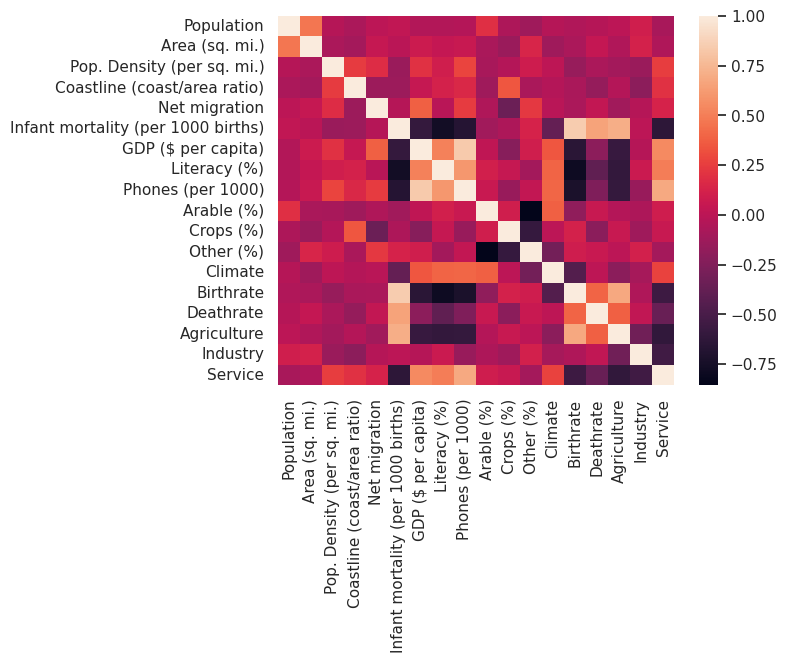

In [68]:
sns.heatmap(ccf.corr(numeric_only=True))

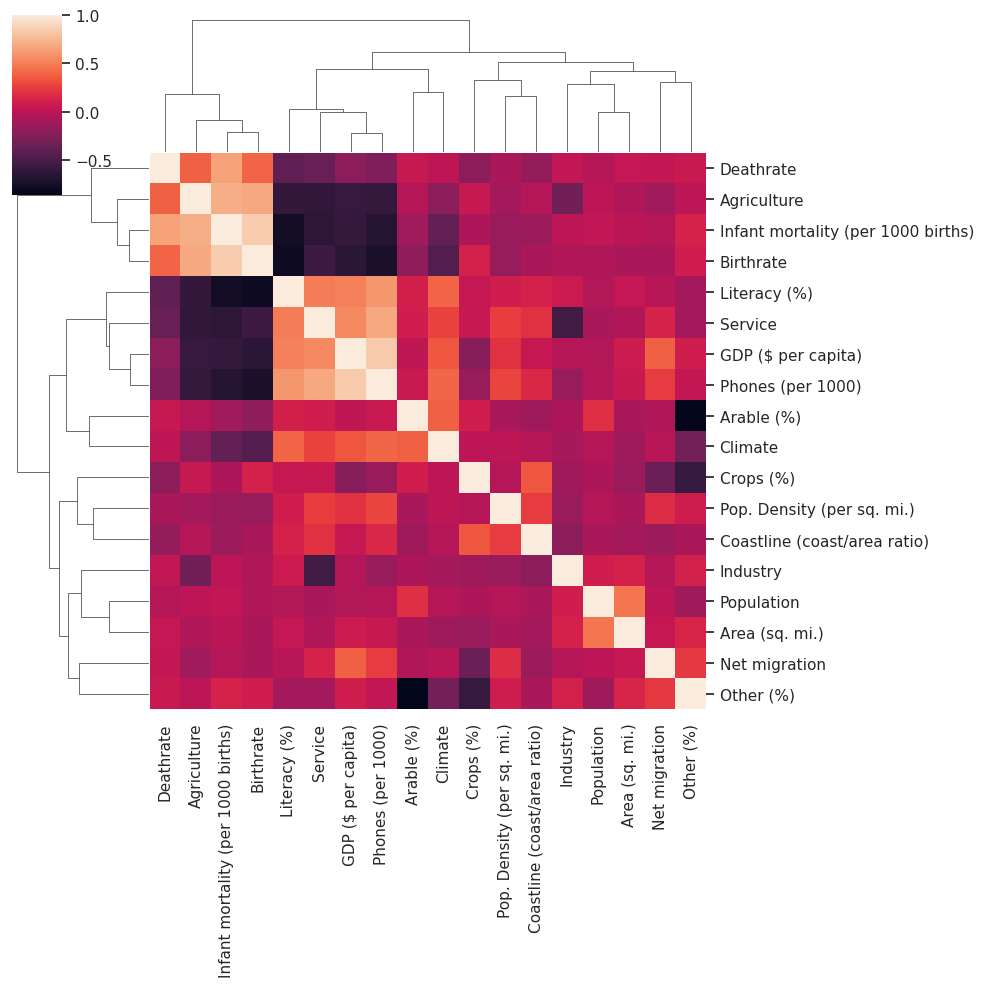

In [69]:
sns.clustermap(ccf.corr(numeric_only=True))

In [70]:
ccf.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [71]:
ccf[ccf['Agriculture'].isnull()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

In [72]:
ccf[ccf['Agriculture'].isnull()] = ccf[ccf['Agriculture'].isnull()].fillna(0)

In [73]:
ccf.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

In [74]:
ccf['Climate'] = ccf['Climate'].fillna(ccf.groupby('Region')['Climate'].transform('mean'))

In [75]:
ccf.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                                0
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

In [76]:
ccf[ccf['Literacy (%)'].isnull()]

Country                               Region  Population  \
25   Bosnia & Herzegovina  EASTERN EUROPE                          4498976   
66          Faroe Islands  WESTERN EUROPE                            47246   
74             Gaza Strip  NEAR EAST                               1428757   
85               Guernsey  WESTERN EUROPE                            65409   
99            Isle of Man  WESTERN EUROPE                            75441   
104                Jersey  WESTERN EUROPE                            91084   
108              Kiribati  OCEANIA                                  105432   
123             Macedonia  EASTERN EUROPE                          2050554   
185              Slovakia  EASTERN EUROPE                          5439448   
187       Solomon Islands  OCEANIA                                  552438   
209                Tuvalu  OCEANIA                                   11810   
220        Virgin Islands              LATIN AMER. & CARIB          108605   
222             West Bank  NEAR EAST                               2460492   

     Area (sq. mi.)  Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
25            51129                        88.0                          0.04   
66             1399                        33.8                         79.84   
74              360                      3968.8                         11.11   
85               78                       838.6                         64.10   
99              572                       131.9                         27.97   
104             116                       785.2                         60.34   
108             811                       130.0                        140.94   
123           25333                        80.9                          0.00   
185           48845                       111.4                          0.00   
187           28450                        19.4                         18.67   
209              26                       454.2                         92.31   
220            1910                        56.9                          9.84   
222            5860                       419.9                          0.00   

     Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)  \
25            0.31                               21.05              6100.0   
66            1.41                                6.24             22000.0   
74            1.60                               22.93               600.0   
85            3.84                                4.71             20000.0   
99            5.36                                5.93             21000.0   
104           2.76                                5.24             24800.0   
108           0.00                               48.52               800.0   
123          -1.45                               10.09              6700.0   
185           0.30                                7.41             13300.0   
187           0.00                               21.29              1700.0   
209           0.00                               20.03              1100.0   
220          -8.94                                8.03             17200.0   
222           2.98                               19.62               800.0   

     Literacy (%)  Phones (per 1000)  Arable (%)  Crops (%)  Other (%)  \
25            NaN              215.4       13.60       2.96      83.44   
66            NaN              503.8        2.14       0.00      97.86   
74            NaN              244.3       28.95      21.05      50.00   
85            NaN              842.4         NaN        NaN        NaN   
99            NaN              676.0        9.00       0.00      91.00   
104           NaN              811.3        0.00       0.00     100.00   
108           NaN               42.7        2.74      50.68      46.58   
123           NaN              260.0       22.26       1.81      75.93   
185           NaN              

In [77]:
ccf['Literacy (%)'] = ccf['Literacy (%)'].fillna(ccf.groupby('Region')['Literacy (%)'].transform('mean'))

In [78]:
ccf.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

In [147]:
ccf = ccf.dropna()

In [148]:
X = ccf.drop("Country",axis=1)

In [149]:
X = pd.get_dummies(X)

In [171]:
scaler = StandardScaler()

In [172]:
scaled_X = scaler.fit_transform(X)

In [173]:
scaled_X

array([[-2.39626639e-02, -4.05131263e-02, -2.50543021e-01, ...,
        -7.37209781e-02, -7.37209781e-02, -3.79348444e-01],
       [-2.36105443e-01, -3.56879621e-01, -1.46808305e-01, ...,
        -7.37209781e-02, -7.37209781e-02,  1.50285935e+00],
       [-9.50011903e-03,  8.46199854e-01, -2.96857999e-01, ...,
        -7.37209781e-02, -7.37209781e-02, -6.48235272e-01],
       ...,
       [-9.80924893e-02, -1.01628544e-01, -2.60564391e-01, ...,
        -7.37209781e-02, -7.37209781e-02,  4.27312040e-01],
       [-1.74950750e-01,  1.32314235e-02, -2.94826640e-01, ...,
         1.35646600e+01, -7.37209781e-02, -3.79348444e-01],
       [-1.69277246e-01, -1.71875740e-01, -2.73158814e-01, ...,
        -7.37209781e-02,  1.35646600e+01, -3.79348444e-01]],
      shape=(185, 216))

In [174]:
ssd = []

for k in range(2,30):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    ssd.append(model.inertia_)

Text(0, 0.5, 'Sum of Squared Distances')

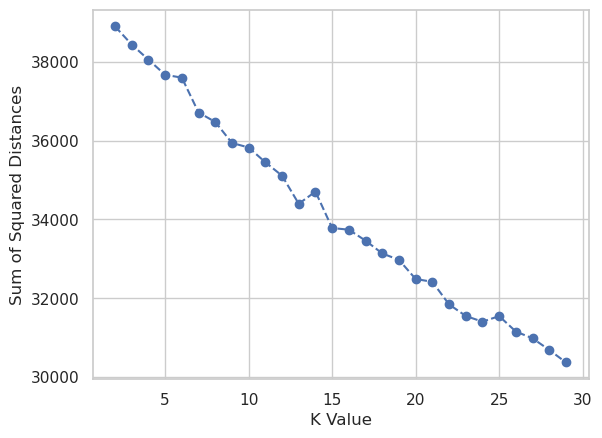

In [175]:
plt.plot(range(2,30),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel("Sum of Squared Distances")

<Axes: >

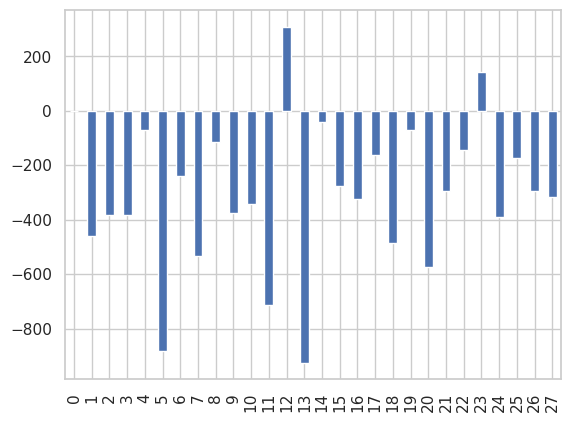

In [176]:
pd.Series(ssd).diff().plot(kind='bar')

In [177]:
model = KMeans(n_clusters=5)
model.fit(scaled_X)

KMeans(n_clusters=5)

In [178]:
model.labels_

array([3, 4, 4, 4, 2, 3, 4, 4, 2, 4, 2, 2, 4, 1, 2, 4, 2, 2, 4, 3, 2, 3,
       4, 3, 4, 2, 3, 3, 3, 3, 3, 2, 3, 3, 4, 4, 4, 3, 3, 4, 3, 2, 4, 2,
       3, 4, 4, 4, 4, 3, 3, 2, 3, 4, 2, 2, 4, 4, 3, 4, 2, 3, 2, 2, 3, 4,
       4, 0, 4, 3, 3, 4, 4, 4, 2, 2, 2, 4, 4, 4, 1, 2, 2, 1, 2, 4, 2, 2,
       1, 2, 3, 0, 2, 2, 1, 3, 3, 2, 1, 3, 3, 4, 2, 2, 2, 3, 3, 4, 4, 3,
       2, 4, 3, 2, 3, 4, 3, 4, 4, 3, 3, 4, 3, 4, 2, 4, 3, 3, 2, 1, 3, 4,
       4, 3, 4, 4, 2, 2, 4, 1, 2, 2, 3, 4, 4, 0, 2, 1, 3, 4, 3, 2, 2, 2,
       4, 3, 3, 2, 4, 3, 4, 2, 2, 3, 3, 2, 3, 0, 4, 1, 3, 4, 3, 2, 2, 2,
       4, 3, 4, 4, 4, 0, 1, 3, 3], dtype=int32)

In [179]:
X['K=3 Clusters'] = model.labels_

In [181]:
X.corr()['K=3 Clusters'].sort_values()

Region_NEAR EAST                             -0.449563
GDP ($ per capita)                           -0.387085
Phones (per 1000)                            -0.328349
Region_WESTERN EUROPE                        -0.316909
Net migration                                -0.293209
                                                ...   
Birthrate                                     0.204909
Other (%)                                     0.207599
Agriculture                                   0.219960
Region_LATIN AMER. & CARIB                    0.537911
K=3 Clusters                                  1.000000
Name: K=3 Clusters, Length: 216, dtype: float64

In [182]:
model = KMeans(n_clusters=13)
model.fit(scaled_X)

KMeans(n_clusters=13)

In [183]:
model.labels_

array([ 1, 11,  4,  3,  2,  1,  6,  6,  9,  0,  3,  2,  5,  0,  8, 10,  9,
        2,  6,  7,  2,  8,  6, 12,  6, 11,  7,  8,  7,  8,  7,  0,  1,  1,
        6,  8,  6,  7, 12,  0,  7, 11, 10,  2, 12,  0,  0,  4, 10, 12, 12,
        2,  7,  3,  2,  2,  6,  3, 12,  9,  2,  7,  2,  2,  8, 10,  0,  3,
        6,  1,  7,  6,  6,  6,  0, 11,  2,  8,  8,  8,  6,  2,  2,  0,  2,
       10,  8,  2,  6,  9, 12,  3,  8,  8,  0,  5,  8,  2, 10, 12,  7,  4,
        2,  2,  2, 12,  7,  8,  8,  1,  2,  0, 12, 10,  7,  0,  8,  6,  4,
        1, 12,  3,  8,  3,  3,  6,  1,  7,  2,  6,  8,  3,  0,  3,  6,  6,
       11,  2,  0,  0, 11,  9,  7, 10, 10,  3,  2,  0, 12,  0,  1,  0, 11,
       11,  3,  1, 12,  2,  8, 12,  0,  2,  2,  5, 12,  8,  7,  3,  4, 10,
        5,  3,  7,  9,  2,  2,  0,  5,  3,  6,  8,  3,  6, 12, 12],
      dtype=int32)

In [184]:
X['K=3 Clusters'] = model.labels_

In [185]:
X.corr()['K=3 Clusters'].sort_values()

GDP ($ per capita)                           -0.439050
Phones (per 1000)                            -0.398060
Region_WESTERN EUROPE                        -0.353544
Net migration                                -0.208000
Region_OCEANIA                               -0.207869
                                                ...   
Deathrate                                     0.256446
Region_EASTERN EUROPE                         0.307080
Region_SUB-SAHARAN AFRICA                     0.310814
Cluster                                       0.462336
K=3 Clusters                                  1.000000
Name: K=3 Clusters, Length: 216, dtype: float64

### Adding ISO codes and mapping

In [186]:
iso_codes = pd.read_csv('./data/country-iso-codes.csv')
iso_codes

Country  \
0                                        Afghanistan   
1    Akrotiri and Dhekelia – See United Kingdom, The   
2                                      Åland Islands   
3                                            Albania   
4                                            Algeria   
..                                               ...   
296                                 Congo, Dem. Rep.   
297                             Congo, Repub. of the   
298                                         Tanzania   
299                             Central African Rep.   
300                                    Cote d'Ivoire   

                                            ISO Code  
0                                                AFG  
1    Akrotiri and Dhekelia – See United Kingdom, The  
2                                                ALA  
3                                                ALB  
4                                                DZA  
..                                               ...  
296                                              COD  
297                                              COG  
298                                              TZA  
299                                              CAF  
300                                              CIV  

[301 rows x 2 columns]

In [187]:
iso_map = iso_codes.set_index('Country')['ISO Code'].to_dict()
iso_map

{'Afghanistan': 'AFG',
 'Akrotiri and Dhekelia – See United Kingdom, The': 'Akrotiri and Dhekelia – See United Kingdom, The',
 'Åland Islands': 'ALA',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'American Samoa': 'ASM',
 'Andorra': 'AND',
 'Angola': 'AGO',
 'Anguilla': 'AIA',
 'Antarctica\u200a[a]': 'ATA',
 'Antigua and Barbuda': 'ATG',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Aruba': 'ABW',
 'Ashmore and Cartier Islands – See Australia.': 'Ashmore and Cartier Islands – See Australia.',
 'Australia\u200a[b]': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Bahamas (the)': 'BHS',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Barbados': 'BRB',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Benin': 'BEN',
 'Bermuda': 'BMU',
 'Bhutan': 'BTN',
 'Bolivia (Plurinational State of)': 'BOL',
 'Bonaire\xa0Sint Eustatius\xa0Saba': 'BES',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Bouvet Island': 'BVT',
 'Brazil': 'BRA',
 'British Indian Ocean Territory (the)': 'IOT',
 'British V

In [188]:
ccf.loc[:, 'ISO Code'] = ccf['Country'].map(iso_map)

In [189]:
ccf

Country                               Region  Population  \
0          Afghanistan        ASIA (EX. NEAR EAST)             31056997   
1              Albania  EASTERN EUROPE                          3581655   
2              Algeria  NORTHERN AFRICA                        32930091   
3       American Samoa  OCEANIA                                   57794   
4              Andorra  WESTERN EUROPE                            71201   
..                 ...                                  ...         ...   
219            Vietnam        ASIA (EX. NEAR EAST)             84402966   
221  Wallis and Futuna  OCEANIA                                   16025   
224              Yemen  NEAR EAST                              21456188   
225             Zambia  SUB-SAHARAN AFRICA                     11502010   
226           Zimbabwe  SUB-SAHARAN AFRICA                     12236805   

     Area (sq. mi.)  Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
0            647500                        48.0                          0.00   
1             28748                       124.6                          1.26   
2           2381740                        13.8                          0.04   
3               199                       290.4                         58.29   
4               468                       152.1                          0.00   
..              ...                         ...                           ...   
219          329560                       256.1                          1.05   
221             274                        58.5                         47.08   
224          527970                        40.6                          0.36   
225          752614                        15.3                          0.00   
226          390580                        31.3                          0.00   

     Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)  \
0            23.06                              163.07               700.0   
1            -4.93                               21.52              4500.0   
2            -0.39                               31.00              6000.0   
3           -20.71                                9.27              8000.0   
4             6.60                                4.05             19000.0   
..             ...                                 ...                 ...   
219          -0.45                               25.95              2500.0   
221           0.00                                0.00              3700.0   
224           0.00                               61.50               800.0   
225           0.00                               88.29               800.0   
226           0.00                               67.69              1900.0   

     Literacy (%)  ...  Crops (%)  Other (%)  Climate  Birthrate  Deathrate  \
0            36.0  ...       0.22      87.65      1.0      46.60      20.34   
1            86.5  ...       4.42      74.49      3.0      15.11       5.22   
2            70.0  ...       0.25      96.53      1.0      17.14       4.61   
3            97.0  ...      15.00      75.00      2.0      22.46       3.27   
4           100.0  ...       0.00      97.78      3.0       8.71       6.25   
..            ...  ...        ...        ...      ...        ...        ...   
219          90.3  ...       5.95      74.08      2.0      16.86       6.22   
221          50.0  ...      25.00      70.00      2.0       0.00       0.00   
224          50.2  ...       0.24      96.98      1.0      42.89       8.30   
225          80.6  ...       0.03      92.90      2.0      41.00      19.93   
226          90.7  ...       0.34      91.34      2.0      28.01      21.84   

     Agriculture  Industry  Service  ISO Code  Cluster  
0          0.380     0.240    0.380       AFG        4  
1          0.232     0.188    0.579       ALB       11  
2          0.101     0.600    0.298       DZA        3  
3          0.000     0.000 

In [190]:
ccf.loc[:, 'Cluster'] = model.labels_

In [191]:
ccf

Country                               Region  Population  \
0          Afghanistan        ASIA (EX. NEAR EAST)             31056997   
1              Albania  EASTERN EUROPE                          3581655   
2              Algeria  NORTHERN AFRICA                        32930091   
3       American Samoa  OCEANIA                                   57794   
4              Andorra  WESTERN EUROPE                            71201   
..                 ...                                  ...         ...   
219            Vietnam        ASIA (EX. NEAR EAST)             84402966   
221  Wallis and Futuna  OCEANIA                                   16025   
224              Yemen  NEAR EAST                              21456188   
225             Zambia  SUB-SAHARAN AFRICA                     11502010   
226           Zimbabwe  SUB-SAHARAN AFRICA                     12236805   

     Area (sq. mi.)  Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
0            647500                        48.0                          0.00   
1             28748                       124.6                          1.26   
2           2381740                        13.8                          0.04   
3               199                       290.4                         58.29   
4               468                       152.1                          0.00   
..              ...                         ...                           ...   
219          329560                       256.1                          1.05   
221             274                        58.5                         47.08   
224          527970                        40.6                          0.36   
225          752614                        15.3                          0.00   
226          390580                        31.3                          0.00   

     Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)  \
0            23.06                              163.07               700.0   
1            -4.93                               21.52              4500.0   
2            -0.39                               31.00              6000.0   
3           -20.71                                9.27              8000.0   
4             6.60                                4.05             19000.0   
..             ...                                 ...                 ...   
219          -0.45                               25.95              2500.0   
221           0.00                                0.00              3700.0   
224           0.00                               61.50               800.0   
225           0.00                               88.29               800.0   
226           0.00                               67.69              1900.0   

     Literacy (%)  ...  Crops (%)  Other (%)  Climate  Birthrate  Deathrate  \
0            36.0  ...       0.22      87.65      1.0      46.60      20.34   
1            86.5  ...       4.42      74.49      3.0      15.11       5.22   
2            70.0  ...       0.25      96.53      1.0      17.14       4.61   
3            97.0  ...      15.00      75.00      2.0      22.46       3.27   
4           100.0  ...       0.00      97.78      3.0       8.71       6.25   
..            ...  ...        ...        ...      ...        ...        ...   
219          90.3  ...       5.95      74.08      2.0      16.86       6.22   
221          50.0  ...      25.00      70.00      2.0       0.00       0.00   
224          50.2  ...       0.24      96.98      1.0      42.89       8.30   
225          80.6  ...       0.03      92.90      2.0      41.00      19.93   
226          90.7  ...       0.34      91.34      2.0      28.01      21.84   

     Agriculture  Industry  Service  ISO Code  Cluster  
0          0.380     0.240    0.380       AFG        1  
1          0.232     0.188    0.579       ALB       11  
2          0.101     0.600    0.298       DZA        4  
3          0.000     0.000 

In [192]:
import plotly.express as px

fig = px.choropleth(ccf, locations="ISO Code",
                    color="Cluster", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale='Turbo'
                    )
fig.show()